In [ ]:
!pip install tensorflow opencv-python pillow

^C


In [5]:
!pip install scikit-learn matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.8 MB 4.2 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/7.8 MB 3.5 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/7.8 MB 3.6 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/7.8 MB 3.6 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/7.8 MB 3.6 MB/s eta 0:00:02
   ---------------------- ----------------- 4.5/7.8 MB 3.6 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/7.8 MB 3.6 MB/s eta 0:00:01
   ----------------------------- ---------- 5.8/7.8 MB 3.6 MB/s eta 0:00:01
   --------------------------------- ------ 6.6/7.8 MB 3.6 MB/s eta 0:00:01
   ------------------------------------- -- 7.3/7.8 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 3.6 MB/s eta 0:00:00
   --------------

In [6]:
import cv2
import os
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [9]:
image_directory = 'datasets/'

no_tumor_images = os.listdir(image_directory + 'no/')
yes_tumor_images = os.listdir(image_directory + 'yes/')
dataset = []
label = []

INPUT_SIZE = 64

In [10]:
print('No Brain Tumor Images: ', no_tumor_images)
print('Brain Tumor Images: ', yes_tumor_images)

No Brain Tumor Images:  ['no0.jpg', 'no1.jpg', 'no10.jpg', 'no100.jpg', 'no1000.jpg', 'no1001.jpg', 'no1002.jpg', 'no1003.jpg', 'no1004.jpg', 'no1005.jpg', 'no1006.jpg', 'no1007.jpg', 'no1008.jpg', 'no1009.jpg', 'no101.jpg', 'no1010.jpg', 'no1011.jpg', 'no1012.jpg', 'no1013.jpg', 'no1014.jpg', 'no1015.jpg', 'no1016.jpg', 'no1017.jpg', 'no1018.jpg', 'no1019.jpg', 'no102.jpg', 'no1020.jpg', 'no1021.jpg', 'no1022.jpg', 'no1023.jpg', 'no1024.jpg', 'no1025.jpg', 'no1026.jpg', 'no1027.jpg', 'no1028.jpg', 'no1029.jpg', 'no103.jpg', 'no1030.jpg', 'no1031.jpg', 'no1032.jpg', 'no1033.jpg', 'no1034.jpg', 'no1035.jpg', 'no1036.jpg', 'no1037.jpg', 'no1038.jpg', 'no1039.jpg', 'no104.jpg', 'no1040.jpg', 'no1041.jpg', 'no1042.jpg', 'no1043.jpg', 'no1044.jpg', 'no1045.jpg', 'no1046.jpg', 'no1047.jpg', 'no1048.jpg', 'no1049.jpg', 'no105.jpg', 'no1050.jpg', 'no1051.jpg', 'no1052.jpg', 'no1053.jpg', 'no1054.jpg', 'no1055.jpg', 'no1056.jpg', 'no1057.jpg', 'no1058.jpg', 'no1059.jpg', 'no106.jpg', 'no1060.jp

In [37]:
print('Number of brain tumor images: ', len(yes_tumor_images))
print('Number of no brain tumor images: ', len(no_tumor_images))

Number of brain tumor images:  1500
Number of no brain tumor images:  1500


In [11]:
for i, image_name in enumerate(no_tumor_images):
    if(image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'no/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(0)

for i, image_name in enumerate(yes_tumor_images):
    if(image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'yes/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [38]:
print(len(label))
print(label[0:5])
print(label[-5:])

3000
[0 0 0 0 0]
[1 1 1 1 1]


In [41]:
print(dataset)
print(label)

[[[[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  ...

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]]


 [[[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  ...

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 

In [13]:
print('dataset length = ', len(dataset))
print('label length = ', len(label))

dataset length =  3000
label length =  3000


In [14]:
dataset = np.array(dataset)
label = np.array(label)

In [63]:
x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=0)

print(dataset.shape, x_train.shape, x_test.shape)

(3000, 64, 64, 3) (2400, 64, 64, 3) (600, 64, 64, 3)


In [64]:
x_train = normalize(x_train, axis = 1)
x_test = normalize(x_test, axis = 1)

In [65]:
x_train[0]

array([[[0.1239795 , 0.12470009, 0.12356611],
        [0.05089019, 0.05245178, 0.0494966 ],
        [0.01521561, 0.01660342, 0.01384877],
        ...,
        [0.1555471 , 0.15434955, 0.15705562],
        [0.12955972, 0.12966927, 0.13113304],
        [0.12311651, 0.12315623, 0.12483455]],

       [[0.12533447, 0.12605553, 0.12492398],
        [0.05089019, 0.05245178, 0.0494966 ],
        [0.01244913, 0.01383618, 0.01107901],
        ...,
        [0.23332065, 0.23220729, 0.23353487],
        [0.13819703, 0.13687312, 0.13977918],
        [0.10723051, 0.10726511, 0.10889822]],

       [[0.12533447, 0.12605553, 0.12492398],
        [0.04780593, 0.04936638, 0.04640306],
        [0.01244913, 0.01383618, 0.00969414],
        ...,
        [0.25105847, 0.24996431, 0.25265469],
        [0.11084554, 0.10949849, 0.11239975],
        [0.09002068, 0.08872546, 0.09030584]],

       ...,

       [[0.12668943, 0.12741096, 0.12628185],
        [0.05089019, 0.05245178, 0.0494966 ],
        [0.01244913, 0

In [66]:
# Model Building

model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(INPUT_SIZE, INPUT_SIZE, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

C:\Users\91827\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
# Binary CrossEntropy = 1, sigmoid

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [68]:
history = model.fit(x_train, y_train, batch_size=16, verbose=1, epochs=10, validation_data = (x_test, y_test), shuffle = False)

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5977 - loss: 0.6616 - val_accuracy: 0.7317 - val_loss: 0.5123
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7755 - loss: 0.5062 - val_accuracy: 0.8000 - val_loss: 0.4241
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8515 - loss: 0.3766 - val_accuracy: 0.8217 - val_loss: 0.3724
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8774 - loss: 0.3128 - val_accuracy: 0.8383 - val_loss: 0.3426
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8900 - loss: 0.2689 - val_accuracy: 0.8700 - val_loss: 0.2540
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9312 - loss: 0.1953 - val_accuracy: 0.9333 - val_loss: 0.1779
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9524 - loss: 0.1405 - val_accuracy: 0.9617 - val_loss: 0.1247
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9642 - loss: 0.1092 - val_accu

In [69]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test Accuracy = ', accuracy)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9656 - loss: 0.1135
Test Accuracy =  0.9649999737739563


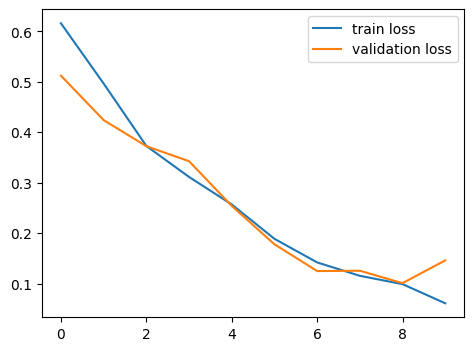

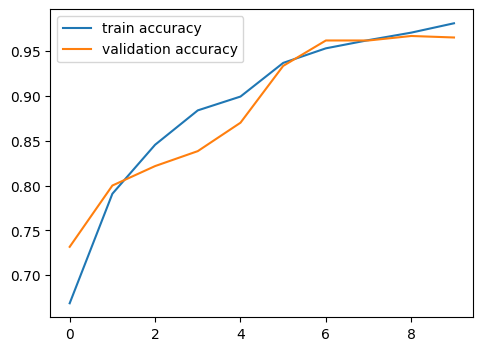

In [70]:
h = history

# Plot the loss value
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# Plot the accuracy value
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

Image loaded successfully.
Image preprocessed for prediction.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Raw model output: [[1.9979138e-09]]
Prediction: No Brain Tumor Detected (Confidence: 0.00%)


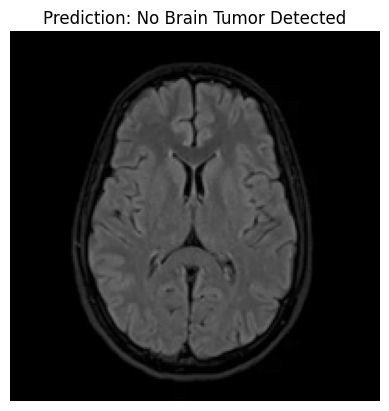

In [71]:
def predict_brain_tumor(image_path):
    # Step 1: Load the image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Unable to load image. Check the path.")
        return  # Exit if image can't be loaded

    print("Image loaded successfully.")

    # Step 2: Convert and resize the image for model input
    image = Image.fromarray(image, 'RGB').resize((INPUT_SIZE, INPUT_SIZE))
    image = np.array(image) / 255.0  # Normalize the image
    image = np.expand_dims(image, axis=0)  # Add batch dimension for model input
    print("Image preprocessed for prediction.")

    # Step 3: Make prediction
    prediction = model.predict(image)
    print(f"Raw model output: {prediction}")  # Print raw prediction output
    
    # Step 4: Interpret the prediction
    if prediction[0][0] > 0.5:
        result = "Brain Tumor Detected"
    else:
        result = "No Brain Tumor Detected"
    
    # Step 5: Display result
    print(f"Prediction: {result} (Confidence: {prediction[0][0] * 100:.2f}%)")
    plt.imshow(Image.open(image_path).resize((200, 200)))
    plt.axis('off')
    plt.title(f'Prediction: {result}')
    plt.show()

predict_brain_tumor("D:\\Major Project\\AI-based-Medical-Web-Application\\medical_app\\uploads\\pred0.jpg")